EXP 1:Implement and demonstrate the FIND-S algorithm for finding the most specific hypothesis based on a given set of training data samples

In [ ]:
# FIND-S Algorithm Implementation

# Training data
# Attributes: Sky, AirTemp, Humidity, Wind, Water, Forecast
# Target: EnjoySport (Yes / No)

training_data = [
    ['Sunny', 'Warm', 'Normal', 'Strong', 'Warm', 'Same', 'Yes'],
    ['Sunny', 'Warm', 'High', 'Strong', 'Warm', 'Same', 'Yes'],
    ['Rainy', 'Cold', 'High', 'Strong', 'Warm', 'Change', 'No'],
    ['Sunny', 'Warm', 'High', 'Strong', 'Cool', 'Change', 'Yes']
]

# Step 1: Initialize the most specific hypothesis
num_attributes = len(training_data[0]) - 1
hypothesis = ['0'] * num_attributes

print("Initial Hypothesis:", hypothesis)

# Step 2: Iterate through training examples
for example in training_data:
    if example[-1] == 'Yes':  # Positive example
        for i in range(num_attributes):
            if hypothesis[i] == '0':
                hypothesis[i] = example[i]
            elif hypothesis[i] != example[i]:
                hypothesis[i] = '?'

    print("Updated Hypothesis:", hypothesis)

# Final hypothesis
print("\nMost Specific Hypothesis Found:")
print(hypothesis)


Initial Hypothesis: ['0', '0', '0', '0', '0', '0']
Updated Hypothesis: ['Sunny', 'Warm', 'Normal', 'Strong', 'Warm', 'Same']
Updated Hypothesis: ['Sunny', 'Warm', '?', 'Strong', 'Warm', 'Same']
Updated Hypothesis: ['Sunny', 'Warm', '?', 'Strong', 'Warm', 'Same']
Updated Hypothesis: ['Sunny', 'Warm', '?', 'Strong', '?', '?']

Most Specific Hypothesis Found:
['Sunny', 'Warm', '?', 'Strong', '?', '?']


EXP 2:For a given set of training data examples stored in a .CSV file, implement and demonstrate the Candidate-Elimination algorithm in python to output a description of the set of all hypotheses consistent with the training examples

In [ ]:
import numpy as np
import pandas as pd
data = pd.DataFrame(data=pd.read_csv('enjoysport.csv'))
concepts = np.array(data.iloc[:,0:-1])
print(concepts)
target = np.array(data.iloc[:,-1])
print(target)
def learn(concepts, target):
    specific_h = concepts[0].copy()
    print("initialization of specific_h and general_h")
    print(specific_h)
    general_h = [["?" for i in range(len(specific_h))] for i in
range(len(specific_h))]
    print(general_h)
    for i, h in enumerate(concepts):
        if target[i] == "yes":
            for x in range(len(specific_h)):
                if h[x]!= specific_h[x]:
                    specific_h[x] ='?'
                    general_h[x][x] ='?'

                print(specific_h)
        print(specific_h)
        if target[i] == "no":
            for x in range(len(specific_h)):
                if h[x]!= specific_h[x]:
                    general_h[x][x] = specific_h[x]
                else:
                    general_h[x][x] = '?'
        print(" steps of Candidate Elimination Algorithm",i+1)
        print(specific_h)
        print(general_h)
    indices = [i for i, val in enumerate(general_h) if val ==['?', '?', '?', '?', '?', '?']]
    for i in indices:
        general_h.remove(['?', '?', '?', '?', '?', '?'])
    return specific_h, general_h
s_final, g_final = learn(concepts, target)
print("Final Specific_h:", s_final, sep="\n")
print("Final General_h:", g_final, sep="\n")

[['sunny' 'warm' 'normal' 'strong' 'warm' 'same']
 ['sunny' 'warm' 'high' 'strong' 'warm' 'same']
 ['rainy' 'cold' 'high' 'strong' 'warm' 'change']
 ['sunny' 'warm' 'high' 'strong' 'cool' 'change']]
['yes' 'yes' 'no' 'yes']
initialization of specific_h and general_h
['sunny' 'warm' 'normal' 'strong' 'warm' 'same']
[['?', '?', '?', '?', '?', '?'], ['?', '?', '?', '?', '?', '?'], ['?', '?', '?', '?', '?', '?'], ['?', '?', '?', '?', '?', '?'], ['?', '?', '?', '?', '?', '?'], ['?', '?', '?', '?', '?', '?']]
['sunny' 'warm' 'normal' 'strong' 'warm' 'same']
['sunny' 'warm' 'normal' 'strong' 'warm' 'same']
['sunny' 'warm' 'normal' 'strong' 'warm' 'same']
['sunny' 'warm' 'normal' 'strong' 'warm' 'same']
['sunny' 'warm' 'normal' 'strong' 'warm' 'same']
['sunny' 'warm' 'normal' 'strong' 'warm' 'same']
['sunny' 'warm' 'normal' 'strong' 'warm' 'same']
 steps of Candidate Elimination Algorithm 1
['sunny' 'warm' 'normal' 'strong' 'warm' 'same']
[['?', '?', '?', '?', '?', '?'], ['?', '?', '?', '?', '

EXP 3:Demonstrate the working of the decision tree based ID3 algorithm. Use an appropriate data set for building the decision tree and apply this knowledge to classify a new sample.

In [ ]:
import math
import csv

def load_csv(filename):
    lines = csv.reader(open(filename, "r"))
    dataset = list(lines)
    headers = dataset.pop(0)
    return dataset, headers

class Node:
    def __init__(self, attribute):   # ✅ corrected from _init → __init__
        self.attribute = attribute
        self.children = []
        self.answer = ""

def subtables(data, col, delete):
    dic = {}
    coldata = [row[col] for row in data]
    attr = list(set(coldata))
    counts = [0] * len(attr)
    r = len(data)
    c = len(data[0])
    for x in range(len(attr)):
        for y in range(r):
            if data[y][col] == attr[x]:
                counts[x] += 1
    for x in range(len(attr)):
        dic[attr[x]] = [[0 for i in range(c)] for j in range(counts[x])]
        pos = 0
        for y in range(r):
            if data[y][col] == attr[x]:
                temp = data[y][:]
                if delete:
                    del temp[col]
                dic[attr[x]][pos] = temp
                pos += 1
    return attr, dic

def entropy(S):
    attr = list(set(S))
    if len(attr) == 1:
        return 0
    counts = [0] * len(attr)
    for i in range(len(attr)):
        counts[i] = sum([1 for x in S if attr[i] == x]) / (len(S) * 1.0)
    sums = 0
    for cnt in counts:
        if cnt != 0:
            sums += -1 * cnt * math.log(cnt, 2)
    return sums

def compute_gain(data, col):
    attr, dic = subtables(data, col, delete=False)
    total_size = len(data)
    total_entropy = entropy([row[-1] for row in data])
    sub_entropy = 0
    for x in range(len(attr)):
        ratio = len(dic[attr[x]]) / (total_size * 1.0)
        entropies = entropy([row[-1] for row in dic[attr[x]]])
        sub_entropy += ratio * entropies
    gain = total_entropy - sub_entropy
    return gain

def build_tree(data, features):
    lastcol = [row[-1] for row in data]
    if len(set(lastcol)) == 1:
        node = Node("")
        node.answer = lastcol[0]
        return node
    n = len(data[0]) - 1
    gains = [0] * n
    for col in range(n):
        gains[col] = compute_gain(data, col)
    split = gains.index(max(gains))
    node = Node(features[split])
    fea = features[:split] + features[split + 1:]
    attr, dic = subtables(data, split, delete=True)
    for x in range(len(attr)):
        child = build_tree(dic[attr[x]], fea)
        node.children.append((attr[x], child))
    return node

def print_tree(node, level):
    if node.answer != "":
        print(" " * level, "→", node.answer)
        return
    print(" " * level, node.attribute)
    for value, n in node.children:
        print(" " * (level + 1), value)
        print_tree(n, level + 2)

def classify(node, x_test, features):
    if node.answer != "":
        print(node.answer)
        return
    pos = features.index(node.attribute)
    for value, n in node.children:
        if x_test[pos] == value:
            classify(n, x_test, features)

# --- Main program ---
dataset, features = load_csv("id3.csv")
node1 = build_tree(dataset, features)
print("The decision tree for the dataset using ID3 algorithm is:")
print_tree(node1, 0)

testdata, features = load_csv("id3_test_1.csv")  # Assuming test data is in id3_test_1.csv
for xtest in testdata:
    print("\nThe test instance:", xtest)
    print("The label for test instance:", end=" ")
    classify(node1, xtest, features)

The decision tree for the dataset using ID3 algorithm is:
 Outlook
  overcast
   → yes
  rain
   Wind
    weak
     → yes
    strong
     → no
  sunny
   Humidity
    high
     → no
    normal
     → yes

The test instance: ['rain', 'cool', 'normal', 'strong']
The label for test instance: no

The test instance: ['sunny', 'mild', 'normal', 'strong']
The label for test instance: yes


exp 4:Build an Artificial Neural Network by implementing the Backpropagation algorithm and test the same using appropriate data sets.

In [ ]:
import numpy as np

X = np.array(([2, 9], [1, 5], [3, 6]), dtype=float)
y = np.array(([92], [86], [89]), dtype=float)
X = X/np.amax(X,axis=0) #maximum of X array longitudinally
y = y/100

#Sigmoid Function
def sigmoid (x):
    return 1/(1 + np.exp(-x))

#Derivative of Sigmoid Function
def derivatives_sigmoid(x):
    return x * (1 - x)

#Variable initialization
epoch=5 #Setting training iterations
lr=0.1 #Setting learning rate

inputlayer_neurons = 2 #number of features in data set
hiddenlayer_neurons = 3 #number of hidden layers neurons
output_neurons = 1 #number of neurons at output layer
#weight and bias initialization

wh=np.random.uniform(size=(inputlayer_neurons,hiddenlayer_neurons))
bh=np.random.uniform(size=(1,hiddenlayer_neurons))
wout=np.random.uniform(size=(hiddenlayer_neurons,output_neurons))
bout=np.random.uniform(size=(1,output_neurons))

#draws a random range of numbers uniformly of dim x*y
for i in range(epoch):
    #Forward Propogation
    hinp1=np.dot(X,wh)
    hinp=hinp1 + bh
    hlayer_act = sigmoid(hinp)
    outinp1=np.dot(hlayer_act,wout)
    outinp= outinp1+bout
    output = sigmoid(outinp)

    #Backpropagation
    EO = y-output
    outgrad = derivatives_sigmoid(output)
    d_output = EO * outgrad
    EH = d_output.dot(wout.T)
    hiddengrad = derivatives_sigmoid(hlayer_act)#how much hidden layer wts contributed to error
    d_hiddenlayer = EH * hiddengrad

    wout += hlayer_act.T.dot(d_output) *lr   # dotproduct of nextlayererror and currentlayerop
    wh += X.T.dot(d_hiddenlayer) *lr

    print ("-----------Epoch-", i+1, "Starts----------")
    print("Input: \n" + str(X))
    print("Actual Output: \n" + str(y))
    print("Predicted Output: \n" ,output)
    print ("-----------Epoch-", i+1, "Ends----------\n")

print("Input: \n" + str(X))
print("Actual Output: \n" + str(y))
print("Predicted Output: \n" ,output)

-----------Epoch- 1 Starts----------
Input: 
[[0.66666667 1.        ]
 [0.33333333 0.55555556]
 [1.         0.66666667]]
Actual Output: 
[[0.92]
 [0.86]
 [0.89]]
Predicted Output: 
 [[0.70166491]
 [0.68681421]
 [0.69912461]]
-----------Epoch- 1 Ends----------

-----------Epoch- 2 Starts----------
Input: 
[[0.66666667 1.        ]
 [0.33333333 0.55555556]
 [1.         0.66666667]]
Actual Output: 
[[0.92]
 [0.86]
 [0.89]]
Predicted Output: 
 [[0.70630869]
 [0.69111775]
 [0.70377945]]
-----------Epoch- 2 Ends----------

-----------Epoch- 3 Starts----------
Input: 
[[0.66666667 1.        ]
 [0.33333333 0.55555556]
 [1.         0.66666667]]
Actual Output: 
[[0.92]
 [0.86]
 [0.89]]
Predicted Output: 
 [[0.71076697]
 [0.69525522]
 [0.70824899]]
-----------Epoch- 3 Ends----------

-----------Epoch- 4 Starts----------
Input: 
[[0.66666667 1.        ]
 [0.33333333 0.55555556]
 [1.         0.66666667]]
Actual Output: 
[[0.92]
 [0.86]
 [0.89]]
Predicted Output: 
 [[0.7150496 ]
 [0.6992352 ]
 [0.712

EXP 5:Write a program for Implementation of K-Nearest Neighbours (K-NN) in Python

In [ ]:
from math import sqrt
from statistics import mode
l=[[33.6,50,1],[26.6,30,0],[23.4,40,0],[43.1,67,0],[35.3,23,1],[35.9,67,1],[36.7,45,1],[25.7,46,0],[23.3,29,0],[31,56,1]]
n=[43.6,40]
k=3
m=[]
x=[]
for i in l:
    a=0
    for j in range(len(n)-1):
        a+= (i[j]-n[j])*(i[j]-n[j])
    m.append(sqrt(a))
a=sorted(m)
for i in range(k):
    x.append(m.index(a[i]))
y=[]
for i in x:
    print(l[i])
    y.append(l[i][-1])
print()
print("result -->",mode(y))

[43.1, 67, 0]
[36.7, 45, 1]
[35.9, 67, 1]

result --> 1


EXP 6:Write a program to implement Naïve Bayes algorithm in python and to display the results using confusion matrix and accuracy

In [ ]:
# import required libraries
from sklearn.datasets import load_iris
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score

# load iris dataset
iris = load_iris()

# split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.3, random_state=0)

# create Naive Bayes classifier
classifier = GaussianNB()

# train the classifier using the training data
classifier.fit(X_train, y_train)

# predict the target values for the testing data
y_pred = classifier.predict(X_test)

# display confusion matrix and accuracy score
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)

acc = accuracy_score(y_test, y_pred)
print("Accuracy Score:", acc)

Confusion Matrix:
[[16  0  0]
 [ 0 18  0]
 [ 0  0 11]]
Accuracy Score: 1.0


EXP 7:Write a program to implement Logistic Regression (LR) algorithm in python

[0 0 0 0 0 0 0 0 0 1 0 0 1 1 0 1 0 1 0 1 1 1 1 0 0 0 1 1 0 1 0 0 1 0 1 0 0
 1 1 1 1 1 1 1 0 0 0 1 1 0 0 1 0 1 1 0 0 1 0 1 1 1 1 1 0 0 0 1 0 0 1 1 1 0
 1 0 0 0 0 1 0 1 1 1 0 1 1 1 1 1 1 0 1 0 0 1 0 0 0 1]


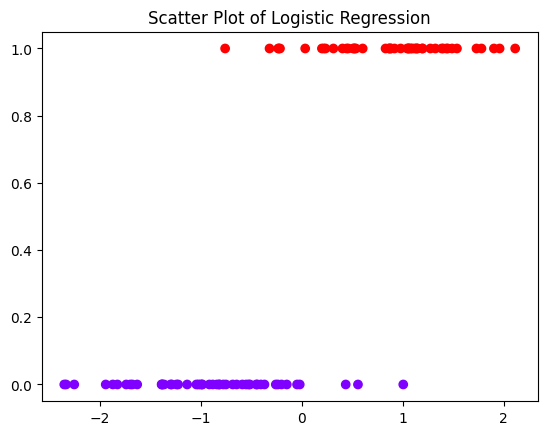

array([[14,  2],
       [ 0,  9]])

In [ ]:
# Step 1: Import the required modules
from sklearn.datasets import make_classification
from matplotlib import pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import pandas as pd

# Step 2: Generate the dataset
x, y = make_classification(
    n_samples=100,
    n_features=1,
    n_classes=2,
    n_clusters_per_class=1,
    flip_y=0.03,
    n_informative=1,
    n_redundant=0,
    n_repeated=0
)
print(y)

# Step 3: visualize the data
plt.scatter(x, y, c=y, cmap='rainbow')
plt.title('Scatter Plot of Logistic Regression')
plt.show()

# Step 4: Split the dataset
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=1)

x_train.shape

# Step 4: Perform Logistic Regression
log_reg = LogisticRegression()
log_reg.fit(x_train, y_train)

# Step 5: Make prediction using the model
y_pred = log_reg.predict(x_test)

# Step 6: Display the Confusion Matrix
confusion_matrix(y_test, y_pred)

EXP 8:Write a program to implement Linear Regression (LR) algorithm in python

Slope (m): 0.6176946148762643
Intercept (c): 2.136116825825789


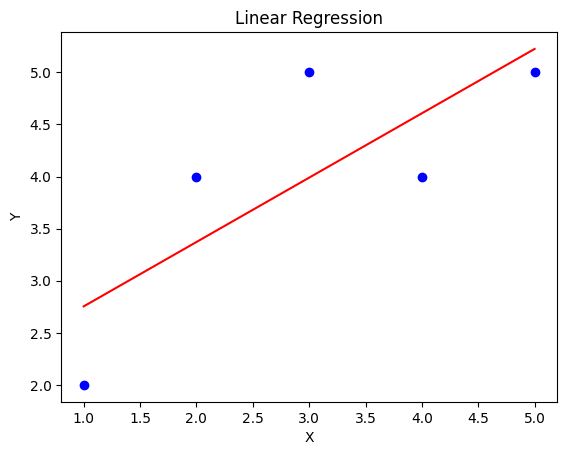

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Sample data
X = np.array([1, 2, 3, 4, 5])
Y = np.array([2, 4, 5, 4, 5])

# Initialize parameters
m = 0       # slope
c = 0       # intercept
alpha = 0.01  # learning rate
epochs = 1000
n = len(X)

# Gradient Descent
for _ in range(epochs):
    Y_pred = m * X + c
    dm = (-2/n) * sum(X * (Y - Y_pred))
    dc = (-2/n) * sum(Y - Y_pred)
    m = m - alpha * dm
    c = c - alpha * dc

print("Slope (m):", m)
print("Intercept (c):", c)

# Plotting
plt.scatter(X, Y, color='blue')
plt.plot(X, m * X + c, color='red')
plt.xlabel("X")
plt.ylabel("Y")
plt.title("Linear Regression")
plt.show()


EXP 9:Compare Linear and Polynomial Regression using Python

Linear Regression MSE: 6.222222222222218
Polynomial Regression MSE: 4.3126450477355994e-29


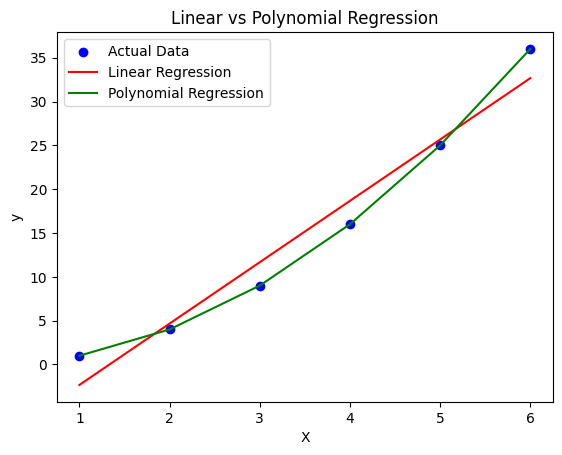

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error
# Sample dataset (non-linear)
X = np.array([1, 2, 3, 4, 5, 6]).reshape(-1, 1)
y = np.array([1, 4, 9, 16, 25, 36])
linear_model = LinearRegression()
linear_model.fit(X, y)

y_linear_pred = linear_model.predict(X)
linear_mse = mean_squared_error(y, y_linear_pred)
poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(X)

poly_model = LinearRegression()
poly_model.fit(X_poly, y)

y_poly_pred = poly_model.predict(X_poly)
poly_mse = mean_squared_error(y, y_poly_pred)
print("Linear Regression MSE:", linear_mse)
print("Polynomial Regression MSE:", poly_mse)

plt.scatter(X, y, color='blue', label='Actual Data')
plt.plot(X, y_linear_pred, color='red', label='Linear Regression')
plt.plot(X, y_poly_pred, color='green', label='Polynomial Regression')
plt.xlabel("X")
plt.ylabel("y")
plt.title("Linear vs Polynomial Regression")
plt.legend()
plt.show()


EXP 10:Write a Python Program to Implement Expectation & Maximization Algorithm

In [ ]:
import numpy as np
from scipy.stats import norm

# Sample data
X = np.array([1, 2, 3, 6, 7, 8])
n = len(X)

# Number of clusters
k = 2

# Initialize parameters
np.random.seed(0)
means = np.random.choice(X, k)
variances = np.ones(k)
weights = np.ones(k) / k

# EM Algorithm
for iteration in range(10):

    # ---------- E-Step ----------
    responsibilities = np.zeros((n, k))

    for i in range(k):
        responsibilities[:, i] = weights[i] * norm.pdf(X, means[i], np.sqrt(variances[i]))

    responsibilities = responsibilities / responsibilities.sum(axis=1, keepdims=True)

    # ---------- M-Step ----------
    Nk = responsibilities.sum(axis=0)

    for i in range(k):
        means[i] = np.sum(responsibilities[:, i] * X) / Nk[i]
        variances[i] = np.sum(responsibilities[:, i] * (X - means[i])**2) / Nk[i]
        weights[i] = Nk[i] / n

    print(f"Iteration {iteration + 1}")
    print("Means:", means)
    print("Variances:", variances)
    print("Weights:", weights)
    print()


Iteration 1
Means: [3 7]
Variances: [6.61234206 0.94786264]
Weights: [0.80016937 0.19983063]

Iteration 2
Means: [3 7]
Variances: [5.30747408 0.62770127]
Weights: [0.69269034 0.30730966]

Iteration 3
Means: [2 7]
Variances: [4.71526644 0.62719303]
Weights: [0.61847927 0.38152073]

Iteration 4
Means: [2 7]
Variances: [2.18057868 0.64943353]
Weights: [0.54366264 0.45633736]

Iteration 5
Means: [2 7]
Variances: [0.86232262 0.66325334]
Weights: [0.5061725 0.4938275]

Iteration 6
Means: [2 7]
Variances: [0.66758211 0.66670563]
Weights: [0.50002794 0.49997206]

Iteration 7
Means: [2 6]
Variances: [0.66673283 1.66670585]
Weights: [0.50000003 0.49999997]

Iteration 8
Means: [1 6]
Variances: [1.60219328 1.89232002]
Weights: [0.48525586 0.51474414]

Iteration 9
Means: [1 6]
Variances: [1.47175027 2.29962079]
Weights: [0.45671191 0.54328809]

Iteration 10
Means: [1 6]
Variances: [1.37461678 2.6066228 ]
Weights: [0.43548973 0.56451027]



EXP 11:Write a program for the task of Credit Score Classification

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
# Sample dataset
data = {
    'Income': [50000, 60000, 30000, 80000, 20000, 90000],
    'Credit_History': [1, 1, 0, 1, 0, 1],
    'Loan_Amount': [200000, 250000, 150000, 300000, 100000, 350000],
    'Credit_Score': ['Good', 'Good', 'Poor', 'Good', 'Poor', 'Good']
}

df = pd.DataFrame(data)
print(df)
le = LabelEncoder()
df['Credit_Score'] = le.fit_transform(df['Credit_Score'])
X = df.drop('Credit_Score', axis=1)
y = df['Credit_Score']
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
model = LogisticRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
new_customer = np.array([[70000, 1, 220000]])
new_customer = scaler.transform(new_customer)

prediction = model.predict(new_customer)
print("Predicted Credit Score:", le.inverse_transform(prediction))


   Income  Credit_History  Loan_Amount Credit_Score
0   50000               1       200000         Good
1   60000               1       250000         Good
2   30000               0       150000         Poor
3   80000               1       300000         Good
4   20000               0       100000         Poor
5   90000               1       350000         Good
Accuracy: 1.0

Confusion Matrix:
 [[2]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00         2

    accuracy                           1.00         2
   macro avg       1.00      1.00      1.00         2
weighted avg       1.00      1.00      1.00         2

Predicted Credit Score: ['Good']


/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:407: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


EXP 12:Implement Iris Flower Classification using KNN

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
iris = pd.read_csv("IRIS.csv")
print(iris.head())
print()
print(iris.describe())
print("Target Labels", iris["species"].unique())

import plotly.io as io
import plotly.express as px
fig = px.scatter(iris, x="sepal_width", y="sepal_length", color="species")
fig.show()
x = iris.drop("species", axis=1)
y = iris["species"]
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y,test_size=0.2,random_state=0)

from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(x_train, y_train)

x_new = np.array([[6, 2.9, 1, 0.2]])
prediction = knn.predict(x_new)
print("Prediction: {}".format(prediction))

   sepal_length  sepal_width  petal_length  petal_width      species
0           5.1          3.5           1.4          0.2  Iris-setosa
1           4.9          3.0           1.4          0.2  Iris-setosa
2           4.7          3.2           1.3          0.2  Iris-setosa
3           4.6          3.1           1.5          0.2  Iris-setosa
4           5.0          3.6           1.4          0.2  Iris-setosa

       sepal_length  sepal_width  petal_length  petal_width
count    150.000000   150.000000    150.000000   150.000000
mean       5.843333     3.054000      3.758667     1.198667
std        0.828066     0.433594      1.764420     0.763161
min        4.300000     2.000000      1.000000     0.100000
25%        5.100000     2.800000      1.600000     0.300000
50%        5.800000     3.000000      4.350000     1.300000
75%        6.400000     3.300000      5.100000     1.800000
max        7.900000     4.400000      6.900000     2.500000
Target Labels ['Iris-setosa' 'Iris-versicolor

Prediction: ['Iris-setosa']


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning:

X does not have valid feature names, but KNeighborsClassifier was fitted with feature names



EXP 13:Implement the Car Price Prediction Model using Python

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# Create sample car dataset
data = {
    'Year': [2014, 2015, 2016, 2017, 2018, 2019, 2020],
    'Present_Price': [5.5, 6.0, 6.5, 7.0, 7.5, 8.0, 8.5],
    'Kms_Driven': [50000, 40000, 30000, 20000, 15000, 10000, 5000],
    'Fuel_Type': [0, 1, 0, 1, 0, 1, 0],
    'Selling_type': [0, 0, 1, 1, 0, 1, 0],
    'Transmission': [0, 1, 0, 1, 0, 1, 0],
    'Owner': [0, 0, 0, 0, 0, 0, 0],
    'Selling_Price': [3.5, 4.0, 4.5, 5.0, 5.5, 6.0, 6.5]
}

df = pd.DataFrame(data)

X = df.drop('Selling_Price', axis=1)
y = df['Selling_Price']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

model = LinearRegression()
model.fit(X_train, y_train)

prediction = model.predict(X_test)
print("Predicted Prices:", prediction)


Predicted Prices: [2.97826088 3.47826088]


EXP 14:Implement House price Prediction using appropriate machine learning algorithm

In [ ]:
# Import required libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Create sample house price dataset
data = {
    'Area': [800, 900, 1000, 1100, 1200, 1300, 1400, 1500],
    'Bedrooms': [1, 2, 2, 3, 3, 3, 4, 4],
    'House_Age': [20, 18, 15, 12, 10, 8, 5, 3],
    'Distance_City': [15, 14, 13, 10, 9, 7, 6, 5],
    'Price': [30, 35, 40, 50, 55, 65, 75, 85]  # Price in Lakhs
}

# Convert dictionary to DataFrame
df = pd.DataFrame(data)

# Split features and target
X = df.drop('Price', axis=1)
y = df['Price']

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=42
)

# Create and train Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict on test data
y_pred = model.predict(X_test)

# Evaluate the model
print("Mean Squared Error:", mean_squared_error(y_test, y_pred))
print("R2 Score:", r2_score(y_test, y_pred))

# Predict price of a new house
# Example: Area=1250, Bedrooms=3, House_Age=8, Distance_City=7
new_house = np.array([[1250, 3, 8, 7]])
predicted_price = model.predict(new_house)

print("Predicted House Price:", predicted_price[0], "Lakhs")


Mean Squared Error: 32.1257509745799
R2 Score: 0.8572188845574227
Predicted House Price: 65.50149970005995 Lakhs


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning:

X does not have valid feature names, but LinearRegression was fitted with feature names



EXP 15:Implement Iris Flower Classification using Naive Bayes classifier

In [ ]:
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn import datasets
from sklearn.metrics import confusion_matrix
#Load the iris dataset
iris = datasets.load_iris()
#GaussianNB and MultinomialNB Models
gnb = GaussianNB()
mnb = MultinomialNB()
#Train both GaussianNB and MultinomialNB Models and print their confusion matrices
y_pred_gnb = gnb.fit(iris.data, iris.target).predict(iris.data)
cnf_matrix_gnb = confusion_matrix(iris.target, y_pred_gnb)
print("Confusion Matrix of GNB \n",cnf_matrix_gnb)

y_pred_mnb = mnb.fit(iris.data, iris.target).predict(iris.data)
cnf_matrix_mnb = confusion_matrix(iris.target, y_pred_mnb)
print("Confusion Matrix of MNB \n",cnf_matrix_mnb)

Confusion Matrix of GNB 
 [[50  0  0]
 [ 0 47  3]
 [ 0  3 47]]
Confusion Matrix of MNB 
 [[50  0  0]
 [ 0 46  4]
 [ 0  3 47]]


EXP 16:Compare different types Classification Algorithms and evaluate their performance

In [ ]:
import numpy
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import BernoulliNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.metrics import classification_report

iris= pd.read_csv("IRIS.csv")
print(iris.head())

x = iris.drop("species", axis=1)
y = iris["species"]
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y,test_size=0.2,random_state=42)

#x = np.array(data[["Age", "EstimatedSalary"]])
#y = np.array(data[["Purchased"]])

#xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.10, random_state=42)
decisiontree = DecisionTreeClassifier()
logisticregression = LogisticRegression()
knearestclassifier = KNeighborsClassifier()
#svm_classifier = SVC()
bernoulli_naiveBayes = BernoulliNB()
passiveAggressive = PassiveAggressiveClassifier()

knearestclassifier.fit(x_train, y_train)
decisiontree.fit(x_train, y_train)
logisticregression.fit(x_train, y_train)
passiveAggressive.fit(x_train, y_train)

data1 = {"Classification Algorithms": ["KNN Classifier", "Decision Tree Classifier",
                                       "Logistic Regression", "Passive Aggressive Classifier"],
      "Score": [knearestclassifier.score(x_test,y_test), decisiontree.score(x_test, y_test),
                logisticregression.score(x_test, y_test), passiveAggressive.score(x_test,y_test) ]}
score = pd.DataFrame(data1)
print(score)

   sepal_length  sepal_width  petal_length  petal_width      species
0           5.1          3.5           1.4          0.2  Iris-setosa
1           4.9          3.0           1.4          0.2  Iris-setosa
2           4.7          3.2           1.3          0.2  Iris-setosa
3           4.6          3.1           1.5          0.2  Iris-setosa
4           5.0          3.6           1.4          0.2  Iris-setosa
       Classification Algorithms  Score
0                 KNN Classifier    1.0
1       Decision Tree Classifier    1.0
2            Logistic Regression    1.0
3  Passive Aggressive Classifier    1.0


EXP 17:Implement Mobile Price Prediction using appropriate machine learning algorithm

In [ ]:
# Import required libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Create sample mobile dataset
data = {
    'Battery_Power': [800, 1000, 1200, 1500, 1800, 2000, 2500, 3000],
    'RAM': [1, 2, 2, 3, 4, 6, 8, 12],  # GB
    'Internal_Memory': [8, 16, 32, 64, 128, 128, 256, 512],  # GB
    'Camera': [5, 8, 12, 16, 20, 32, 48, 64],  # MP
    'Screen_Size': [4.5, 4.7, 5.0, 5.5, 6.0, 6.2, 6.5, 6.8],  # inches
    'Price_Range': [0, 0, 1, 1, 2, 2, 3, 3]
}

# Convert dictionary to DataFrame
df = pd.DataFrame(data)

# Split features and target
X = df.drop('Price_Range', axis=1)
y = df['Price_Range']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=42
)

# Train Random Forest Classifier
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Predict on test data
y_pred = model.predict(X_test)

# Evaluate model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Predict price range of a new mobile
# Example: Battery=2200, RAM=6GB, Memory=128GB, Camera=32MP, Screen=6.2"
new_mobile = np.array([[2200, 6, 128, 32, 6.2]])
prediction = model.predict(new_mobile)

price_labels = ["Low", "Medium", "High", "Very High"]
print("Predicted Price Range:", price_labels[prediction[0]])


Accuracy: 1.0

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00         1
           2       1.00      1.00      1.00         1

    accuracy                           1.00         2
   macro avg       1.00      1.00      1.00         2
weighted avg       1.00      1.00      1.00         2

Predicted Price Range: High


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning:

X does not have valid feature names, but RandomForestClassifier was fitted with feature names



EXP 18:Implement Perceptron based IRIS classification

In [ ]:
from sklearn import datasets
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Perceptron
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

iris = datasets.load_iris()
X = iris.data[:, [2, 3]]
y = iris.target

X_train, X_test, y_train, y_test = train_test_split(
 X, y, test_size=0.3, random_state=1, stratify=y)
sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

ppn = Perceptron(eta0=0.1, random_state=1)
ppn.fit(X_train_std, y_train)
y_pred = ppn.predict(X_test_std)

print('Accuracy: %.3f' % accuracy_score(y_test, y_pred))
print('Accuracy: %.3f' % ppn.score(X_test_std, y_test))

Accuracy: 0.978
Accuracy: 0.978


EXP 19:Implementation of Naive Bayes classification for Bank Loan prediction

In [ ]:
# Import required libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Create sample bank loan dataset
data = {
    'Age': [25, 30, 45, 35, 50, 28, 40, 60],
    'Income': [30000, 50000, 80000, 60000, 90000, 45000, 70000, 100000],
    'Loan_Amount': [100000, 200000, 300000, 250000, 400000, 150000, 280000, 500000],
    'Credit_Score': [650, 700, 750, 720, 780, 680, 740, 800],
    'Employment_Years': [2, 5, 10, 7, 15, 3, 9, 20],
    'Loan_Approved': [0, 1, 1, 1, 1, 0, 1, 1]
}

# Convert dictionary to DataFrame
df = pd.DataFrame(data)

# Split features and target
X = df.drop('Loan_Approved', axis=1)
y = df['Loan_Approved']

# Split into training and testing data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=42
)

# Train Naive Bayes classifier
model = GaussianNB()
model.fit(X_train, y_train)

# Predict on test data
y_pred = model.predict(X_test)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Predict loan approval for a new customer
# Example: Age=32, Income=55000, Loan=180000, CreditScore=710, EmploymentYears=6
new_customer = np.array([[32, 55000, 180000, 710, 6]])
prediction = model.predict(new_customer)

if prediction[0] == 1:
    print("Loan Status: APPROVED")
else:
    print("Loan Status: NOT APPROVED")


Accuracy: 0.5

Confusion Matrix:
 [[0 1]
 [0 1]]

Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       0.50      1.00      0.67         1

    accuracy                           0.50         2
   macro avg       0.25      0.50      0.33         2
weighted avg       0.25      0.50      0.33         2

Loan Status: APPROVED


/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning:

X does not have valid feature names, but GaussianNB was fitted with feature names



EXP 20:Implement Future Sales Prediction using a suitable machine learning algorithm

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning:

X does not have valid feature names, but LinearRegression was fitted with feature names



Predicted Sales for Month 13: 306.36
Predicted Sales for Month 14: 322.53
Predicted Sales for Month 15: 338.71


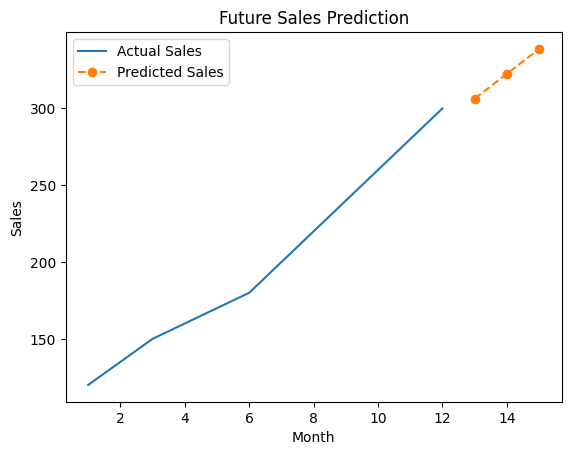

In [ ]:
# Import required libraries
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

# Create sample sales dataset
data = {
    'Month': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12],
    'Sales': [120, 135, 150, 160, 170, 180, 200, 220, 240, 260, 280, 300]
}

# Convert to DataFrame
df = pd.DataFrame(data)

# Features and target
X = df[['Month']]
y = df['Sales']

# Train Linear Regression model
model = LinearRegression()
model.fit(X, y)

# Predict future sales for upcoming months
future_months = np.array([[13], [14], [15]])
future_sales = model.predict(future_months)

# Display predictions
for month, sale in zip(future_months.flatten(), future_sales):
    print(f"Predicted Sales for Month {month}: {sale:.2f}")

# Plot actual vs predicted sales
plt.plot(df['Month'], df['Sales'], label='Actual Sales')
plt.plot(future_months, future_sales, linestyle='dashed', marker='o', label='Predicted Sales')
plt.xlabel('Month')
plt.ylabel('Sales')
plt.title('Future Sales Prediction')
plt.legend()
plt.show()
